In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import denaturationpy as dp

from plotnine import *

In [2]:
system = dp.System(298.3)
fgf2_concentration = dp.FGF2Concentration('fgf2', system,
    agg_Ea=101900000, agg_Tf=393.1, misfold_prob=0.9)
fgf2_concentration.set_initial(1,0,0)
urea_concentration = dp.FixedConcentration('urea', 0)
gdmcl_concentration = dp.FixedConcentration('GdmCl', 0)
fgf2_concentration.add_denaturant(urea_concentration, -8745)
fgf2_concentration.add_denaturant(gdmcl_concentration, -18100)
fgf2_concentration.kf2_enthalpy = 34000
system.add_concentration(fgf2_concentration)
system.add_concentration(urea_concentration)
system.add_concentration(gdmcl_concentration)

In [3]:
def enrich(data):
    data['U_eq'] = data['k_u']/(data['k_f']+data['k_u'])
    data['M_eq'] = data['nu']*data['k_u']*data['k_f']/((data['k_u']+data['k_f2'])*(data['k_u']+data['k_f']))
    data['N_eq'] = data['k_f']/(data['k_f']+data['k_u']) - data['M_eq']

In [4]:
data = pd.DataFrame(columns=['temperature', 'urea', 'k_f', 'k_u', 'k_f2', 'nu'])
temperatures = np.linspace(0, 50, 100)
ureas = np.linspace(0, 1, 100)
for temp in temperatures:
    for urea in ureas:
        system.temperature = 273.3 + temp
        urea_concentration.c0 = urea
        data = data.append(
            {'temperature': temp, 'urea': urea, 'nu': fgf2_concentration.misfold_prob,
            'k_f2': np.exp(fgf2_concentration.ln_kf2(0, system.y0())),
            'k_f': np.exp(fgf2_concentration.ln_kf(0,system.y0())),
            'k_u': np.exp(fgf2_concentration.ln_ku(0, system.y0()))},
            ignore_index=True)

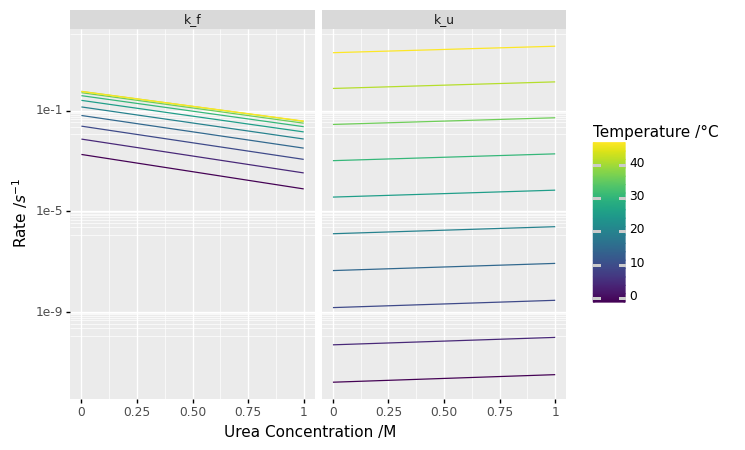

<ggplot: (8747485876384)>

In [5]:
tmp = data[['urea', 'temperature', 'k_f', 'k_u']]
tmp = tmp[tmp.temperature.isin(tmp.temperature.unique()[::10])]
(
    ggplot(tmp.melt(('urea', 'temperature')), aes(x='urea', y='value', colour='temperature', group='variable')) +
    geom_line(aes(group='temperature')) +
    facet_wrap('variable') +
    scale_y_log10() + labs(colour=u'Temperature /\N{DEGREE SIGN}C') +
    ylab(r'Rate /$s^{-1}$') + xlab('Urea /M')
)

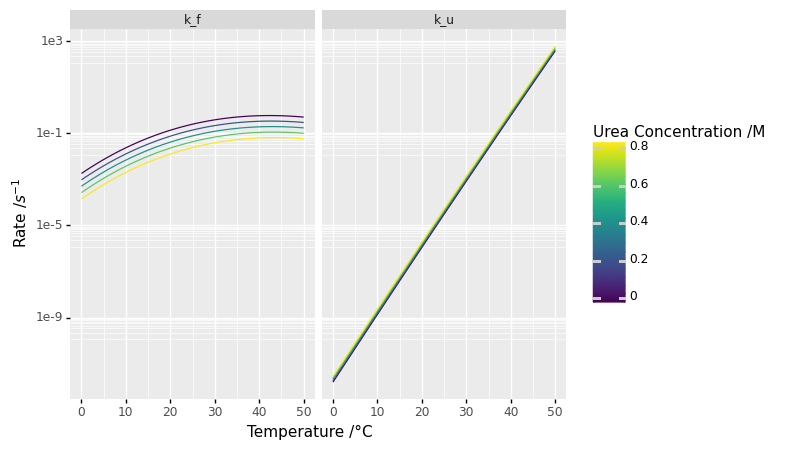

<ggplot: (8747485892669)>

In [6]:
tmp = data[['urea', 'temperature', 'k_f', 'k_u']]
tmp = tmp[tmp.urea.isin(tmp.urea.unique()[::20])]
(
    ggplot(tmp.melt(('urea', 'temperature')), aes(x='temperature', y='value', colour='urea', group='variable')) +
    geom_line(aes(group='urea')) +
    facet_wrap('variable') +
    scale_y_log10() + labs(colour='Urea Concentration /M') +
    ylab(r'Rate $/s^{-1}$') + xlab(u'Temperature /\N{DEGREE SIGN}C')
)

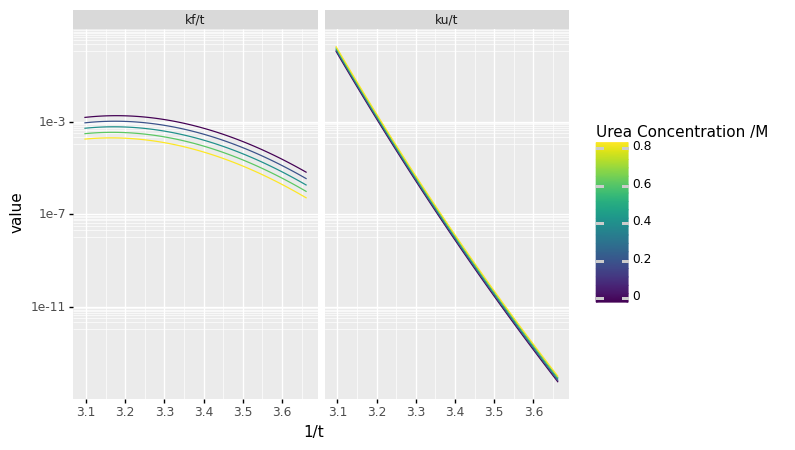

<ggplot: (8747483411529)>

In [7]:
tmp['kf/t'] = tmp['k_f']/(tmp['temperature']+273)
tmp['ku/t'] = tmp['k_u']/(tmp['temperature']+273)
tmp['1/t'] = 1/(tmp['temperature']+273)*1000
(
    ggplot(tmp[['urea', '1/t', 'kf/t', 'ku/t']].melt(('urea', '1/t')),
        aes(x='1/t', y='value', colour='urea', group='variable')) +
    geom_line(aes(group='urea')) +
    facet_wrap('variable') +
    scale_y_log10() + labs(colour='Urea Concentration /M')
)

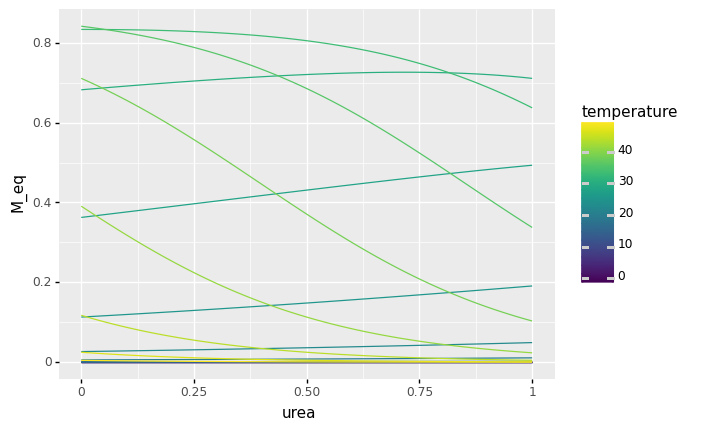

<ggplot: (8747483294278)>

In [8]:
enrich(data)
tmp = data[data.temperature.isin(data.temperature.unique()[::5])]
(
    ggplot(tmp, aes(x='urea', y='M_eq', colour='temperature')) +
    geom_line(aes(group='temperature'))
)

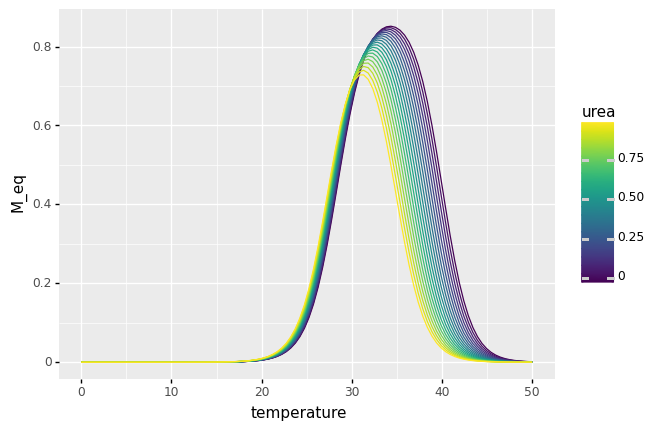

<ggplot: (8747483303933)>

In [9]:
enrich(data)
tmp = data[data.urea.isin(data.urea.unique()[::5])]
(
    ggplot(tmp, aes(x='temperature', y='M_eq', colour='urea')) +
    geom_line(aes(group='urea'))
)

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Unfolded Equilibrium.png


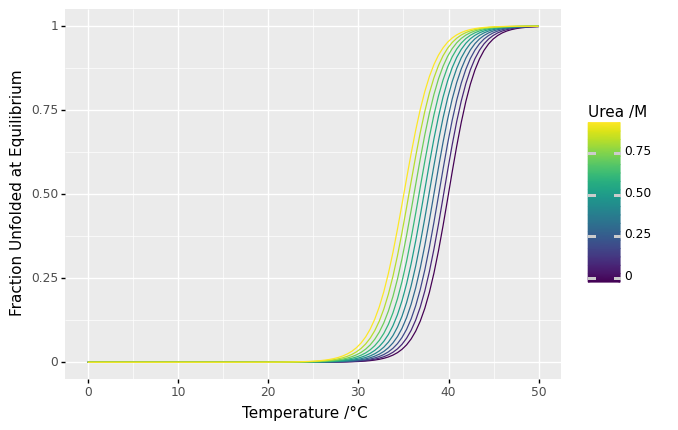

<ggplot: (8747481596904)>

In [10]:
tmp = data[data.urea.isin(data.urea.unique()[::10])]
p = (
    ggplot(tmp, aes(x='temperature', y='U_eq', colour='urea')) +
    geom_line(aes(group='urea')) + labs(colour='Urea /M') +
    ylab('Fraction Unfolded at Equilibrium') + xlab(u'Temperature /\N{DEGREE SIGN}C')
)
p.save('Paper Figures/Unfolded Equilibrium.png')
p

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Native Equilibrium.png


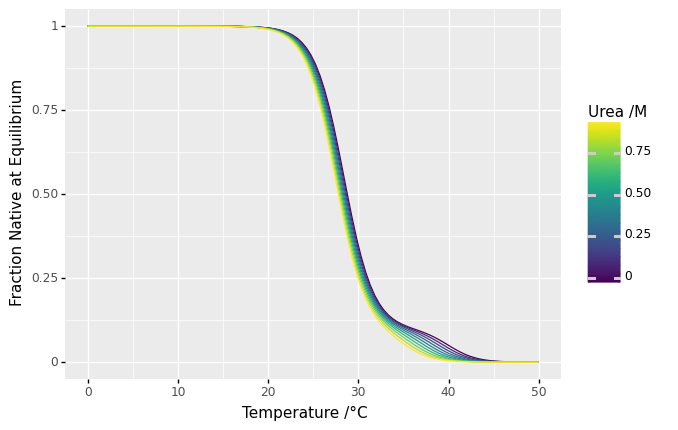

<ggplot: (8747483277008)>

In [11]:
tmp = data[data.urea.isin(data.urea.unique()[::10])]
p = (
    ggplot(tmp, aes(x='temperature', y='N_eq', colour='urea')) +
    geom_line(aes(group='urea')) + labs(colour='Urea /M') +
    ylab('Fraction Native at Equilibrium') + xlab(u'Temperature /\N{DEGREE SIGN}C')
)
p.save('Paper Figures/Native Equilibrium.png')
p

In [12]:
data2 = pd.DataFrame(columns=['temperature', 'urea', 'k_f', 'k_u', 'k_f2', 'nu'])
temperatures = np.linspace(20, 50, 100)
misfolds = np.linspace(0, 1, 10)
for temp in temperatures:
    for misfold in misfolds:
        system.temperature = 273.3 + temp
        urea_concentration.c0 = 0
        fgf2_concentration.misfold_prob = misfold
        data2 = data2.append(
            {'temperature': temp, 'urea': 0, 'nu': fgf2_concentration.misfold_prob,
            'k_f2': np.exp(fgf2_concentration.ln_kf2(0, system.y0())),
            'k_f': np.exp(fgf2_concentration.ln_kf(0,system.y0())),
            'k_u': np.exp(fgf2_concentration.ln_ku(0, system.y0()))},
            ignore_index=True)

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Native Equilibrium Misfold Probability.png


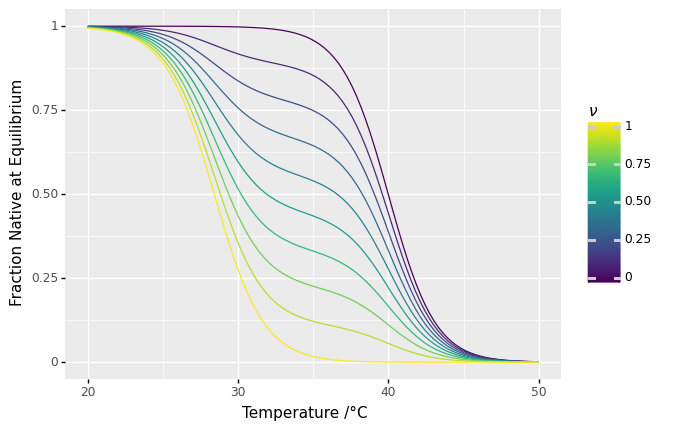

<ggplot: (8747485868668)>

In [13]:
enrich(data2)
tmp = data2.copy()
p = (
    ggplot(tmp, aes(x='temperature', y='N_eq', colour='nu')) +
    geom_line(aes(group='nu')) + labs(colour=r'$\nu$') +
    ylab('Fraction Native at Equilibrium') + xlab(u'Temperature /\N{DEGREE SIGN}C')
)
p.save('Paper Figures/Native Equilibrium Misfold Probability.png')
p

In [14]:
data3 = pd.DataFrame(columns=['temperature', 'gdmcl', 'k_f', 'k_u', 'k_f2', 'nu'])
temperatures = np.linspace(10, 25, 10)
gdmcls = np.linspace(0, 5, 100)
for temp in temperatures:
    for gdmcl in gdmcls:
        system.temperature = 273.3 + temp
        gdmcl_concentration.c0 = gdmcl
        data3 = data3.append(
            {'temperature': temp, 'gdmcl': gdmcl, 'nu': fgf2_concentration.misfold_prob,
            'k_f2': np.exp(fgf2_concentration.ln_kf2(0, system.y0())),
            'k_f': np.exp(fgf2_concentration.ln_kf(0,system.y0())),
            'k_u': np.exp(fgf2_concentration.ln_ku(0, system.y0()))},
            ignore_index=True)

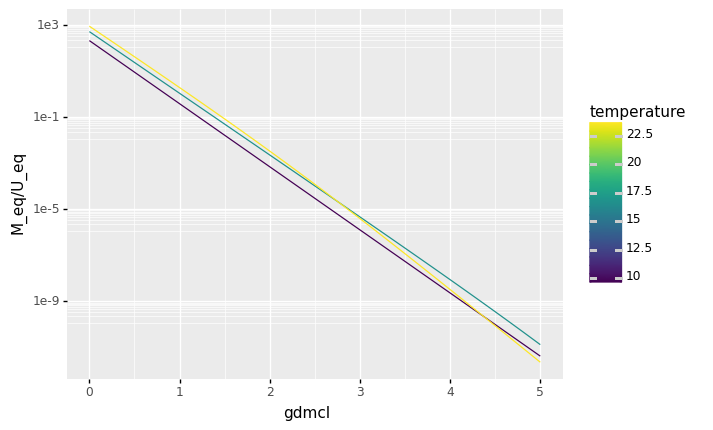

<ggplot: (8747481362818)>

In [15]:
enrich(data3)
tmp = data3.copy()[data3.temperature.isin(data3.temperature.unique()[::4])]
tmp['M_eq/U_eq'] = tmp.M_eq / tmp.U_eq
(
    ggplot(tmp, aes(x='gdmcl', y='M_eq/U_eq', colour='temperature')) +
    geom_line(aes(group='temperature')) +
    scale_y_log10()
)